In [8]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

In [9]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

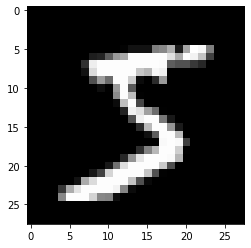

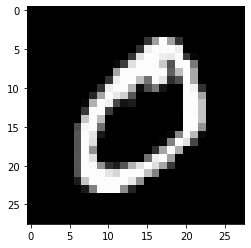

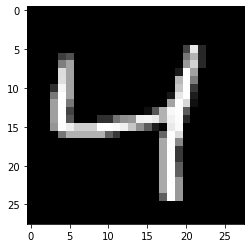

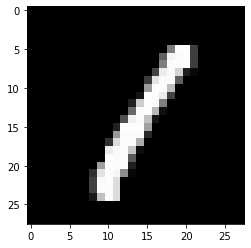

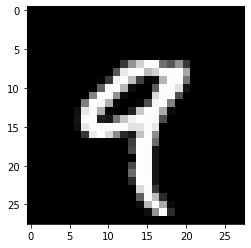

In [10]:
for i in range(5):
  plt.imshow(x_train[i],cmap="gray")
  plt.show()

In [11]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [12]:
x = x_train[:100]
y = y_train[:100]

In [13]:
# converting labels to probabilities

y_encoded = []

for label in y:
    encoded = np.zeros(10)
    encoded[label] = 1
    y_encoded.append(encoded)

In [15]:
print(y_encoded)

[array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]), array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]), array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]), array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]), array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]), array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]), array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]), array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]), array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]), array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]), array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]), array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]), array([0., 0., 0., 

In [14]:
# dataset splitting

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)


In [16]:
x_train.shape

(70, 28, 28)

In [17]:
# reshape our x

# (No.of Images,Width,Height,Channels)

x_train= x_train.reshape(x_train.shape[0],28,28,1)
x_test= x_test.reshape(x_test.shape[0],28,28,1)


In [18]:
x_train.shape

(70, 28, 28, 1)

In [19]:
# model creation

from keras.models import Sequential
from keras.layers import Conv2D,Dense,Flatten,AveragePooling2D

model = Sequential()
model.add(Conv2D(filters=6,kernel_size=(3,3),activation="tanh",input_shape=(28,28,1)))
model.add(AveragePooling2D())
model.add(Conv2D(filters=12,kernel_size=(3,3),activation="tanh"))
model.add(AveragePooling2D())
model.add(Flatten())
model.add(Dense(50,activation="tanh"))
model.add(Dense(10,activation="softmax"))

print(model.summary())



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 6)         60        
_________________________________________________________________
average_pooling2d (AveragePo (None, 13, 13, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 12)        660       
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 12)          0         
_________________________________________________________________
flatten (Flatten)            (None, 300)               0         
_________________________________________________________________
dense (Dense)                (None, 50)                15050     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5

In [20]:
# train the model 

model.compile(loss="sparse_categorical_crossentropy",metrics=["accuracy"])

model.fit(x_train,y_train,epochs=10)


Epoch 1/10
3/3 [==============================] - 33s 36ms/step - loss: 2.3754 - accuracy: 0.1857
Epoch 2/10
3/3 [==============================] - 0s 8ms/step - loss: 1.9024 - accuracy: 0.4714
Epoch 3/10
3/3 [==============================] - 0s 7ms/step - loss: 1.6534 - accuracy: 0.6429
Epoch 4/10
3/3 [==============================] - 0s 6ms/step - loss: 1.4786 - accuracy: 0.7143
Epoch 5/10
3/3 [==============================] - 0s 8ms/step - loss: 1.3404 - accuracy: 0.7714
Epoch 6/10
3/3 [==============================] - 0s 8ms/step - loss: 1.2334 - accuracy: 0.7714
Epoch 7/10
3/3 [==============================] - 0s 7ms/step - loss: 1.1060 - accuracy: 0.8571
Epoch 8/10
3/3 [==============================] - 0s 6ms/step - loss: 1.0038 - accuracy: 0.8714
Epoch 9/10
3/3 [==============================] - 0s 7ms/step - loss: 0.9143 - accuracy: 0.8857
Epoch 10/10
3/3 [==============================] - 0s 8ms/step - loss: 0.8464 - accuracy: 0.9143


In [21]:
score = model.evaluate(x_test,y_test)
print(score)

1/1 [==============================] - 0s 238ms/step - loss: 1.0505 - accuracy: 0.7667
[1.0505279302597046, 0.7666666507720947]


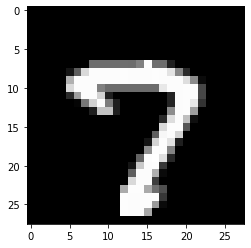

In [37]:
# Running inference

plt.imshow(x_test[3].reshape(28,28),cmap="gray")
plt.show()

In [39]:
result = model.predict([x_test[3].reshape(1, 28, 28, 1)])
print(np.argmax(result))

7
